<a href="https://colab.research.google.com/github/manasik29/Neural-Networks/blob/main/imdb_sentimental_analysis_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
import tensorflow as tf



In [4]:
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import imdb


In [5]:
'''Train a Bidirectional LSTM on the IMDB sentiment classification task.
'''



max_features = 20000        #max numbers of words in our vocablary
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [6]:


print('X_train shape(before pad_sequences): ', X_train.shape)
print('X_test shape(before pad_sequences): ', X_train.shape)

print("Pad sequences (samples x time)")
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train shape(before pad_sequences):  (25000,)
X_test shape(before pad_sequences):  (25000,)
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


# LSTM

In [17]:
layers = 128
dropout = 0.2
epochs = 3
batch_size = 128

In [8]:
tf.keras.layers.Embedding

keras.layers.embeddings.Embedding

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=maxlen))
model.add(tf.keras.layers.LSTM(layers))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 70s 428ms/step - loss: 0.4557 - accuracy: 0.7755 - val_loss: 0.3593 - val_accuracy: 0.8452
Epoch 2/3
157/157 [==============================] - 67s 430ms/step - loss: 0.2336 - accuracy: 0.9087 - val_loss: 0.3756 - val_accuracy: 0.8340
Epoch 3/3
157/157 [==============================] - 66s 422ms/step - loss: 0.1499 - accuracy: 0.9462 - val_loss: 0.4966 - val_accuracy: 0.8404


In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



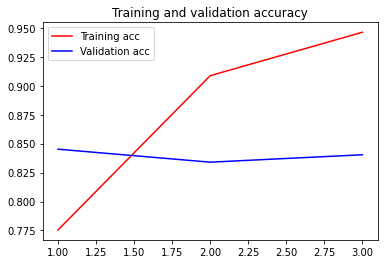

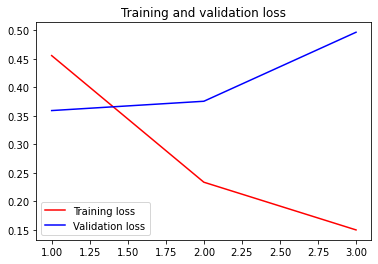

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc',color="red")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color="red")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [13]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 27s 35ms/step - loss: 0.5182 - accuracy: 0.8327


0.8327199816703796

# BLSTM

In [ ]:
layers = 128
dropout = 0.2
epochs = 3
batch_size = 128

In [14]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(layers)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2)

Epoch 1/3
157/157 [==============================] - 131s 809ms/step - loss: 0.4464 - accuracy: 0.7793 - val_loss: 0.3698 - val_accuracy: 0.8414
Epoch 2/3
157/157 [==============================] - 123s 782ms/step - loss: 0.2384 - accuracy: 0.9064 - val_loss: 0.3519 - val_accuracy: 0.8466
Epoch 3/3
157/157 [==============================] - 122s 776ms/step - loss: 0.1492 - accuracy: 0.9480 - val_loss: 0.4018 - val_accuracy: 0.8454


In [19]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 45s 57ms/step - loss: 0.4226 - accuracy: 0.8364


0.8364400267601013

# SimpleRNN

In [20]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 22s 132ms/step - loss: 0.5834 - accuracy: 0.6723 - val_loss: 0.4860 - val_accuracy: 0.7752
Epoch 2/3
157/157 [==============================] - 21s 137ms/step - loss: 0.3110 - accuracy: 0.8699 - val_loss: 0.4139 - val_accuracy: 0.8276
Epoch 3/3
157/157 [==============================] - 20s 130ms/step - loss: 0.1765 - accuracy: 0.9337 - val_loss: 0.4768 - val_accuracy: 0.8016


In [22]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 10s 13ms/step - loss: 0.4750 - accuracy: 0.8085


0.8085200190544128

# GRU

In [23]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(GRU(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,659,201
Trainable params: 2,659,201
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 58s 358ms/step - loss: 0.5338 - accuracy: 0.7185 - val_loss: 0.3664 - val_accuracy: 0.8368
Epoch 2/3
157/157 [==============================] - 55s 351ms/step - loss: 0.2660 - accuracy: 0.8914 - val_loss: 0.3634 - val_accuracy: 0.8412
Epoch 3/3
157/157 [==============================] - 56s 357ms/step - loss: 0.1666 - accuracy: 0.9403 - val_loss: 0.4109 - val_accuracy: 0.8254


In [25]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 21s 27ms/step - loss: 0.4161 - accuracy: 0.8242


0.8241599798202515